<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

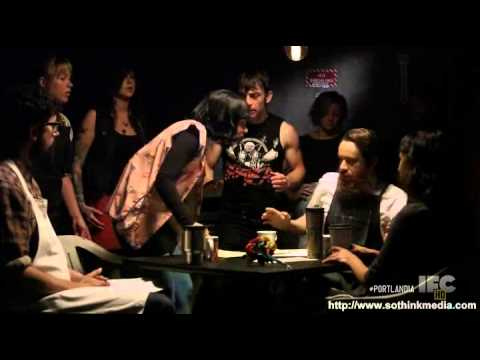

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [32]:
%pwd

'/mnt/c/Users/tigju/Documents/Lambda School/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [152]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [153]:
shops['coffee_shop_name'].value_counts()

Epoch Coffee                            400
Halcyon                                 300
The Factory - Cafe With a Soul          244
Houndstooth Coffee                      200
Venezia Italian Gelato                  200
                                       ... 
Lucky Lab Coffee                         25
Sister Coffee                            17
Kowabunga Coffee                         16
The Marvelous Vintage Tea Party Co.      10
Lola Savannah Coffee Downtown             4
Name: coffee_shop_name, Length: 79, dtype: int64

In [154]:
shops['star_rating'].value_counts()

 5.0 star rating     3780
 4.0 star rating     2360
 3.0 star rating      738
 2.0 star rating      460
 1.0 star rating      278
Name: star_rating, dtype: int64

In [155]:
shops['full_review_text'].value_counts()[:5]

 11/10/2016 3 check-ins This place has been shown on my social media for days so i finally visited! One of THE cutest and artistic looking coffeeshops I have ever visited. You can self order which is nice because you can take your time and look at the pictures to help you decide! I especially liked how pictures were shown so I knew which coffee/tea came out aesthetically  I ordered the famous matcha green latte and i dont usually drink coffee but it went beyond my expectations. They give you a good amount and its creamy and sweet. Only downside is no wifi.. So hard to study here. Matcha green tea and living la vida mocha Matcha green tea latte Interior design See all photos from Sarah L. for The Factory - Cafe With a Soul                                                                                                                                                                                                                                                                             

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [156]:
# clean up star rating
import re

shops['clean_full_review_text'] = shops['full_review_text'].apply(lambda x: re.sub('[\d/]', '', x))
shops['clean_rating'] = shops['star_rating'].apply(lambda x: int(re.sub('[^1-5]', '', x)))

shops.head(3)

,coffee_shop_name,full_review_text,star_rating,clean_full_review_text,clean_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,check-in Love love loved the atmosphere! Ev...,5
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,"Listed in Date Night: Austin, Ambiance in Au...",4
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,check-in Listed in Brunch Spots I loved the...,4


In [157]:
type(shops['clean_rating'][0])

numpy.int64

In [158]:
# convert text to tokens
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_lg")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [159]:
# Tokenizer Pipe

tokens = []

""" Make them tokens """
for doc in tokenizer.pipe(shops['clean_full_review_text'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

shops['tokens'] = tokens

In [160]:
shops.head(3)

,coffee_shop_name,full_review_text,star_rating,clean_full_review_text,clean_rating,tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,check-in Love love loved the atmosphere! Ev...,5,"[ , check-in, Love, love, loved, the, atmosp..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,"Listed in Date Night: Austin, Ambiance in Au...",4,"[ , Listed, in, Date, Night:, Austin,, Ambian..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,check-in Listed in Brunch Spots I loved the...,4,"[ , check-in, Listed, in, Brunch, Spots, I, ..."


In [161]:
shops['tokens'].head()

0    [   , check-in, Love, love, loved, the, atmosp...
1    [  , Listed, in, Date, Night:, Austin,, Ambian...
2    [   , check-in, Listed, in, Brunch, Spots, I, ...
3    [  , Very, cool, decor!, Good, drinks, Nice, s...
4    [   , check-in, They, are, located, within, th...
Name: tokens, dtype: object

In [162]:
# Object from Base Python
from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
shops['tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(20)

[('the', 27779),
 ('and', 25748),
 ('a', 22085),
 ('I', 19780),
 (' ', 17390),
 ('to', 16904),
 ('of', 12495),
 ('is', 11748),
 ('was', 9539),
 ('in', 8901),
 ('for', 8244),
 ('coffee', 7318),
 ('The', 6812),
 ('it', 6370),
 ('with', 6103),
 ('but', 5701),
 ('that', 5607),
 ('  ', 5063),
 ('my', 5004),
 ('you', 4966)]

In [163]:
# fuction which takes a corpus of document and returns and dataframe of word counts for us to analyze.
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [164]:
# Use the Function
wc = count(shops['tokens'])

In [165]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
25,the,6520,27779,1.0,0.034788,0.034788,0.856092
0,and,6804,25748,2.0,0.032244,0.067032,0.893382
2,a,6181,22085,3.0,0.027657,0.094689,0.811581
75,I,5469,19780,4.0,0.024770,0.119459,0.718093
68,,4787,17390,5.0,0.021777,0.141237,0.628545


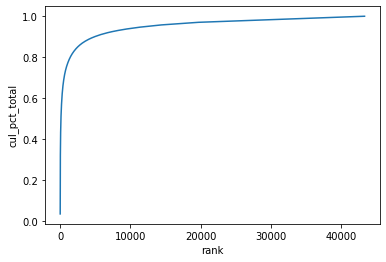

In [168]:
import seaborn as sns

# Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

In [169]:
wc[wc['rank'] <= 100]['cul_pct_total'].max()

0.49114686843716776

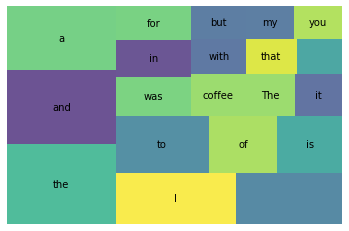

In [170]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [ ]:
nlp.Defaults.stop_words

In [264]:
# Spacy's Default Stop Words plus custom
STOP_WORDS = nlp.Defaults.stop_words.union([' ', '  ', '   ', '-', "it's", "i'm", "i've", "coffee", "latte", "drink", "place"])

In [265]:
tokens = []

for doc in tokenizer.pipe(shops['clean_full_review_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
    tokens.append(doc_tokens)

    
shops['no_stopwords_tokens'] = tokens

In [266]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,clean_full_review_text,clean_rating,tokens,no_stopwords_tokens,lemmas
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,check-in Love love loved the atmosphere! Ev...,5,"[ , check-in, Love, love, loved, the, atmosp...","[check-in, love, love, loved, atmosphere!, cor...","[check, Love, love, love, atmosphere, corner, ..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,"Listed in Date Night: Austin, Ambiance in Au...",4,"[ , Listed, in, Date, Night:, Austin,, Ambian...","[listed, date, night:, austin,, ambiance, aust...","[list, Date, Night, Austin, Ambiance, Austin, ..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,check-in Listed in Brunch Spots I loved the...,4,"[ , check-in, Listed, in, Brunch, Spots, I, ...","[check-in, listed, brunch, spots, loved, eclec...","[check, list, Brunch, Spots, love, eclectic, h..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,Very cool decor! Good drinks Nice seating H...,2,"[ , Very, cool, decor!, Good, drinks, Nice, s...","[cool, decor!, good, drinks, nice, seating, ho...","[cool, decor, good, drink, nice, seating, over..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,check-in They are located within the Northc...,4,"[ , check-in, They, are, located, within, th...","[check-in, located, northcross, mall, shopping...","[check, locate, Northcross, mall, shopping, ce..."


In [267]:
shops['no_stopwords_tokens'].head()

0    [check-in, love, love, loved, atmosphere!, cor...
1    [listed, date, night:, austin,, ambiance, aust...
2    [check-in, listed, brunch, spots, loved, eclec...
3    [cool, decor!, good, drinks, nice, seating, ho...
4    [check-in, located, northcross, mall, shopping...
Name: no_stopwords_tokens, dtype: object

In [268]:
word_count = count(shops['no_stopwords_tokens'])
word_count['word'].head(10)

106       great
163        like
187        good
30     check-in
20         love
775      little
304       don't
161        nice
462        food
607        time
Name: word, dtype: object

In [269]:
word_count.head(10)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
106,great,2438,3250,1.0,0.008868,0.008868,0.320116
163,like,2034,2902,2.0,0.007918,0.016786,0.267069
187,good,2084,2779,3.0,0.007583,0.024369,0.273634
30,check-in,1957,1961,4.0,0.005351,0.029720,0.256959
20,love,1434,1806,5.0,0.004928,0.034648,0.188288
775,little,1230,1479,6.0,0.004036,0.038684,0.161502
304,don't,1133,1395,7.0,0.003806,0.042490,0.148766
161,nice,1188,1368,8.0,0.003733,0.046223,0.155987
462,food,1096,1367,9.0,0.003730,0.049953,0.143908
607,time,1099,1345,10.0,0.003670,0.053623,0.144301


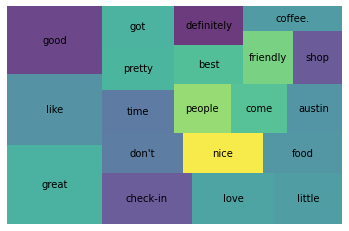

In [270]:
word_count_top20 = word_count[word_count['rank'] <= 20]

squarify.plot(sizes=word_count_top20['pct_total'], label=word_count_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [271]:
word_count.tail(20)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
37707,"monsieur,",1,1,37711.0,0.000003,0.999948,0.000131
37710,delicious...and,1,1,37712.0,0.000003,0.999951,0.000131
37716,"(turkey,",1,1,37713.0,0.000003,0.999954,0.000131
37712,romaine,1,1,37714.0,0.000003,0.999956,0.000131
37714,"rib,",1,1,37715.0,0.000003,0.999959,0.000131
37715,"predictably,",1,1,37716.0,0.000003,0.999962,0.000131
37711,blts,1,1,37717.0,0.000003,0.999965,0.000131
37713,turkey),1,1,37718.0,0.000003,0.999967,0.000131
37717,(pork),1,1,37719.0,0.000003,0.999970,0.000131
37719,roomier,1,1,37720.0,0.000003,0.999973,0.000131


In [272]:
word_count['appears_in_pct'].describe()

count    37730.000000
mean         0.001168
std          0.006254
min          0.000131
25%          0.000131
50%          0.000131
75%          0.000394
max          0.320116
Name: appears_in_pct, dtype: float64

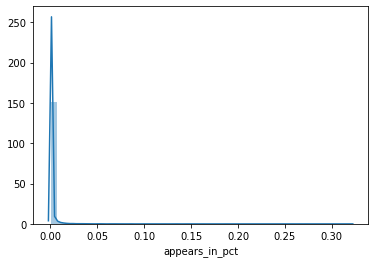

In [273]:
# Frequency of appears in documents
sns.distplot(word_count['appears_in_pct']);

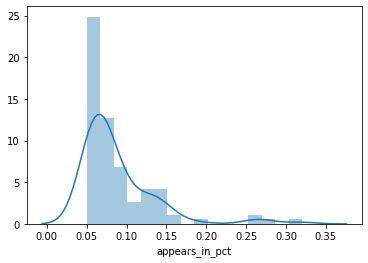

In [274]:
# Tree-Map w/ Words that appear in a least 5% of documents. 

wc = word_count[word_count['appears_in_pct'] >= 0.05]

sns.distplot(wc['appears_in_pct']);

In [275]:
wc.shape

(112, 7)

In [276]:
#lemmatization
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.text.lower() not in STOP_WORDS) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [277]:
from tqdm import tqdm 
tqdm.pandas()

/home/tigju/miniconda3/envs/unit4-machine-learning/lib/python3.8/site-packages/tqdm/std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [278]:
shops['lemmas'] = shops['clean_full_review_text'].progress_apply(get_lemmas)

100%|██████████| 7616/7616 [04:55<00:00, 25.80it/s]


In [279]:
shops['lemmas'].head()

0    [check, Love, love, love, atmosphere, corner, ...
1    [list, Date, Night, Austin, Ambiance, Austin, ...
2    [check, list, Brunch, Spots, love, eclectic, h...
3    [cool, decor, good, drink, nice, seating, over...
4    [check, locate, Northcross, mall, shopping, ce...
Name: lemmas, dtype: object

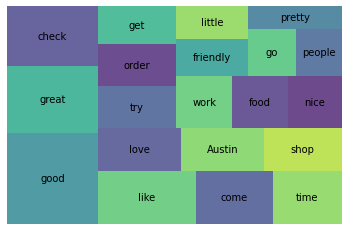

In [280]:
wc_lemmas = count(shops['lemmas'])
wc_lemmas_top20 = wc_lemmas[wc_lemmas['rank'] <= 20]

squarify.plot(sizes=wc_lemmas_top20['pct_total'], label=wc_lemmas_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [282]:
bad_reviews = shops[shops['clean_rating'] <= 3]
good_reviews = shops[shops['clean_rating'] >= 4]

In [283]:
bad_reviews['clean_rating'].value_counts()

3    738
2    460
1    278
Name: clean_rating, dtype: int64

In [284]:
good_reviews['clean_rating'].value_counts()

5    3780
4    2360
Name: clean_rating, dtype: int64

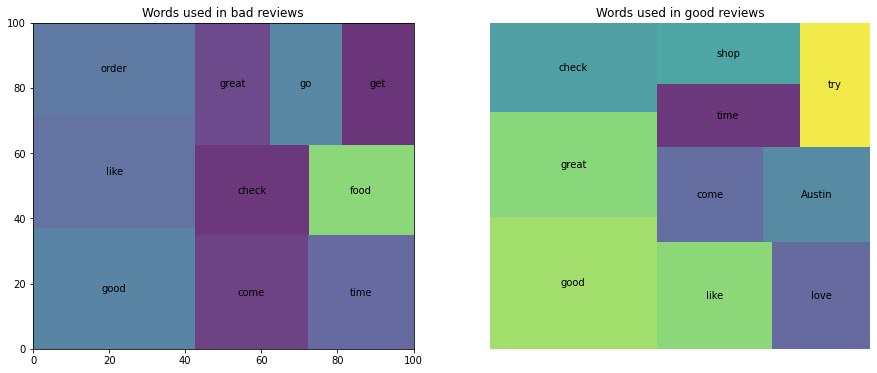

In [285]:
wc_bad_lemmas = count(bad_reviews['lemmas'])
wc_good_lemmas = count(good_reviews['lemmas'])

wc_bad_lemmas_top10 = wc_bad_lemmas[wc_bad_lemmas['rank'] <= 10]
wc_good_lemmas_top10 = wc_good_lemmas[wc_good_lemmas['rank'] <= 10]

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].set_title("Words used in bad reviews")
squarify.plot(sizes=wc_bad_lemmas_top10['pct_total'], label=wc_bad_lemmas_top10['word'], alpha=.8, ax=axes[0])
plt.axis('off')

axes[1].set_title("Words used in good reviews")
squarify.plot(sizes=wc_good_lemmas_top10['pct_total'], label=wc_good_lemmas_top10['word'], alpha=.8, ax=axes[1])
plt.axis('off')

plt.show()

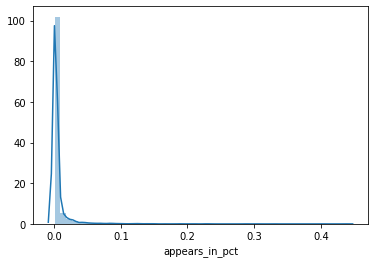

In [286]:
# Frequency of appears in documents
sns.distplot(wc_bad_lemmas['appears_in_pct']);

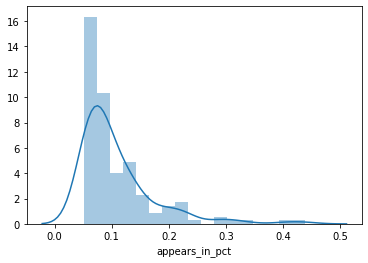

In [287]:
# Tree-Map w/ Words that appear in a least 5% of documents. 

wc_bad = wc_bad_lemmas[wc_bad_lemmas['appears_in_pct'] >= 0.05]

sns.distplot(wc_bad['appears_in_pct']);

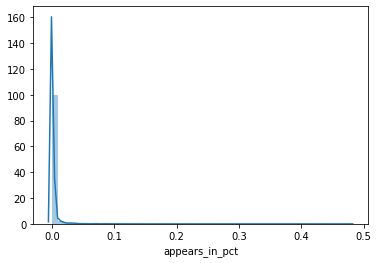

In [288]:
# Frequency of appears in documents
sns.distplot(wc_good_lemmas['appears_in_pct']);

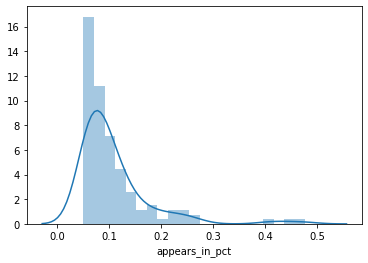

In [289]:
# Tree-Map w/ Words that appear in a least 5% of documents. 

wc_good = wc_good_lemmas[wc_good_lemmas['appears_in_pct'] >= 0.05]

sns.distplot(wc_good['appears_in_pct']);

In [310]:
sns.set(rc={'figure.figsize': (30,1)})
def visualize_sentiments(data):
    sns.heatmap(pd.DataFrame(data).set_index("Sentence").T, center=0, annot=True, cmap="PiYG")

In [312]:
from textblob import TextBlob
sentence1 = bad_reviews['clean_full_review_text'].iloc[0]
print(sentence1)
TextBlob(sentence1).sentiment

  Very cool decor! Good drinks Nice seating  However...  Just about everything is overpriced. $. extra for  ounces of Almond Milk in a cortado. No WiFi Music is a bit loud and the mix is odd.  Pleasant French oldies followed by loud techno. Several tables were dirty when we got there. Service is average.  It feels like a Los Angeles coffee shot that is out of place. 


Sentiment(polarity=0.15711805555555555, subjectivity=0.5468055555555557)

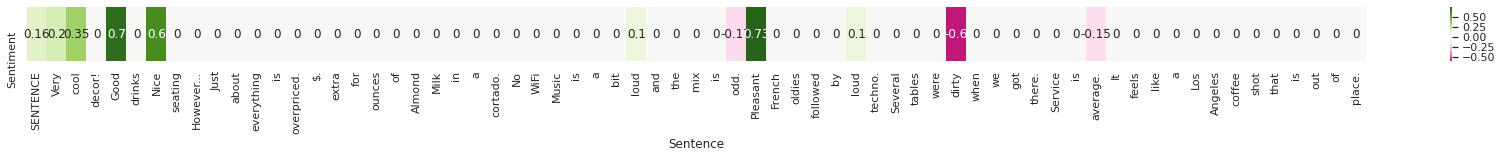

In [313]:
visualize_sentiments({"Sentence": ["SENTENCE"] + sentence1.split(),
    "Sentiment": [TextBlob(sentence1).polarity] + [TextBlob(word).polarity for word in sentence1.split()]
})

In [315]:
sentence2 = good_reviews['clean_full_review_text'].iloc[1]
print(sentence2)
TextBlob(sentence2).sentiment

  Listed in Date Night: Austin, Ambiance in Austin BEAUTIFUL!!!! Love the ambiance! Instagram-worthy!!!  Definitely $$$, so be prepared. This is gonna cost you a pretty penny :) Waffle dessert was just decent...nothing to rave about.  But, will probably be back just to be somewhere unique and nice. 


Sentiment(polarity=0.465625, subjectivity=0.7625)

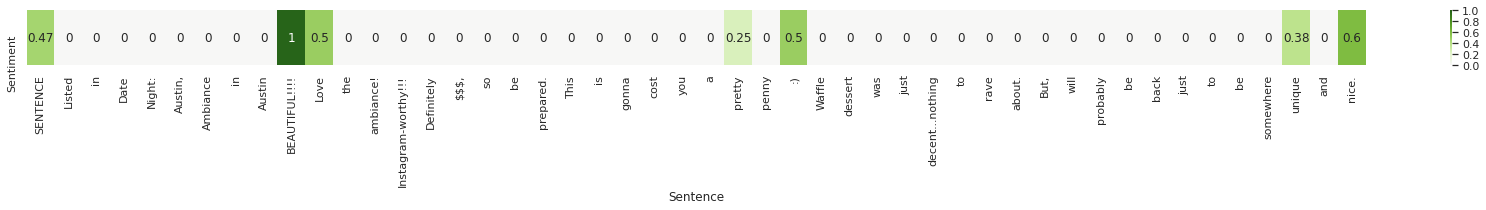

In [316]:
visualize_sentiments({"Sentence": ["SENTENCE"] + sentence2.split(),
    "Sentiment": [TextBlob(sentence2).polarity] + [TextBlob(word).polarity for word in sentence2.split()]
})

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

